# Lab 8: Regression with Scikit-Learn

The objective of this notebook is to learn about the **Scikit-Learn** library (<a href="https://scikit-learn.org/stable/" >official documentation</a>) and **regression**.

In this lab, we will train a regression model that predicts the price of the house given some input features such as 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'.

## Outline

- [1. Load Dataset](#1)
- [2. Data Exploration](#2)
- [3. Linear Regression with 1D input features](#3)
- [4. Regression with all input features](#4)


First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


<a id='1'></a>
## 1. Load dataset

Firstly, you will load the first dataset for this lab into a DataFrame `df`. The dataset is stored in the csv file from the following path `"data_lab8/Housing.csv"`. 

In [4]:
data_path = "data_lab8/Housing.csv"
df = pd.read_csv(data_path)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
print(f"There are {len(df)} samples in the dataset.")

There are 545 samples in the dataset.


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

As you can see, the dataset is composed of many columns. Some are **numerical attributes** (i.e., `price`, `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`). In contrast, other columns are categorical attributes (i.e., `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus`). Remember that Machine Learning algorithms works only with numerical features. Therefore, categorical feature must be encoded to numbers as a pre-prcessing step. We will learn more about pre-processing in the next lectures. For now, let's focus on numerical features.

### Exercise 1.1

Select the list of columns in `numerical_columns` from the DataFrame `df` and assign the selected subset DataFrame to the same variable `df`. 

In [5]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#### START CODE HERE ####
new = df.loc[:, numerical_columns]
#### Approximately 1 line ####

df = new

#### END CODE HERE ####

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


#### Expected output
```           price	area    bedrooms   bathrooms	 stories      parking```<br>
```0	13300000	7420	       4	   2	       3	    2```<br>
```1	12250000	8960	       4	   4	       4	    3```<br>
```2	12250000	9960	       3	   2	       2	    2```<br>
```3	12215000	7500	       4	   2	       2	    3```<br>
```4	11410000	7420	       4	   1	       2	    2```


<a id='2'></a>
## 2. Data Exploration


### Exercise 2.1
Let's start by exploring the **target column** `price`.  Compute the **mean**, the **standard deviation**, and the **variance** of the `price` column. Store the **mean**, the **standard deviation**, and the **variance** in the variables `price_mean`, `price_std`, and `price_var` respectively.

In [7]:
#### START CODE HERE ####
#### Approximately 2 line ####
price_mean = df['price'].mean()
price_std = df['price'].std()
price_var = df['price'].var()

#### END CODE HERE ####

In [8]:
print(f"Price mean: {price_mean:.2f}")
print(f"Price standard deviation: {price_std:.2f}")
print(f"Price variance: {price_var:.2f}")

Price mean: 4766729.25
Price standard deviation: 1870439.62
Price variance: 3498544355820.57


#### Expected output
```Price mean: 4766729.25```<br>
```Price standard deviation: 1870439.62```<br>
```Price variance: 3498544355820.57```

The next cell plots the distributions of the prices. Please run the following cell to show the plot.

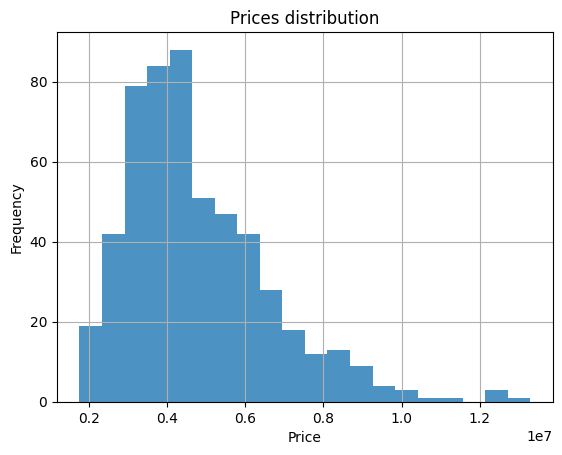

In [15]:
ax = df["price"].plot.hist(bins=20, alpha=0.8) #alpha e il livello di trasparenza del grafico
ax.set_xlabel("Price")
ax.set_title("Prices distribution")
ax.grid(True)
plt.show()

<a id='3'></a>
## 3. Linear Regression with 1D input features

Now you will implement a **Linear Regression** using a one-dimensional input feature (i.e., the *area* of the houses). Therefore, the task is to predict the *Price* of the houses given the *Area*.

Firstly, run the next cell to plot the points in the space.

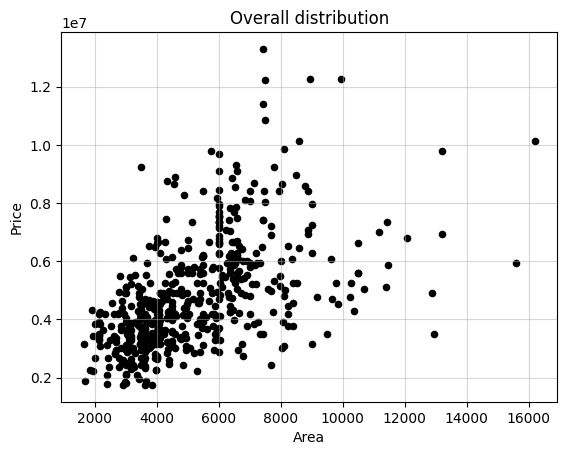

In [16]:
df.plot(x='area', y='price', kind='scatter', c='black') #you can plot directly data from a dataframe
plt.title("Overall distribution")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

You can see that some **noisy points** are present. **Noisy points** can affect the performance of your learning algorithms. Indeed, some points have a really big area far from the distribution of the other points. We will perform a simple pre-processing step to remove the points with *area* >= 12000.

Run the next cell to perform the pre-processing.

In [17]:
df_1d = df.loc[df.area < 12000] #semplice filtro --> togliamo punti di rumore (con area >= 12000)

In [18]:
print(len(df_1d))

538


Now, we will select only the *Area* as input feature `df_X_1d` and the *Price* as target variable `df_Y_1d`.

In [19]:
df_X_1d = df_1d[["area"]] #input feature
df_Y_1d = df_1d[["price"]] #target

As usual, we will split our data into training and test set.

In [21]:
X_train_1d, X_test_1d, y_train_1d, y_test_1d = train_test_split(df_X_1d, df_Y_1d, test_size=0.2, shuffle=True, random_state=42) #function to split data in test set (20%) and training set (80%) --> hold-hout 
#random_state serve per permettere al codice di essere riproducibile, altrimenti ad ogni run creerebbe insiemi con dati diversi

The following cell plots the distribution of the training points in the plane. Run the next cell to visualize the training points.

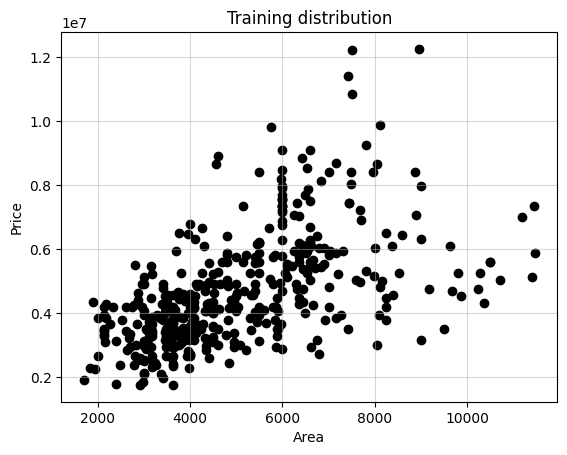

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=X_train_1d, y=y_train_1d, c='black')

ax.set_title("Training distribution")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

The following cell plots the distribution of the test points in the plane. Run the next cell to visualize the test points.

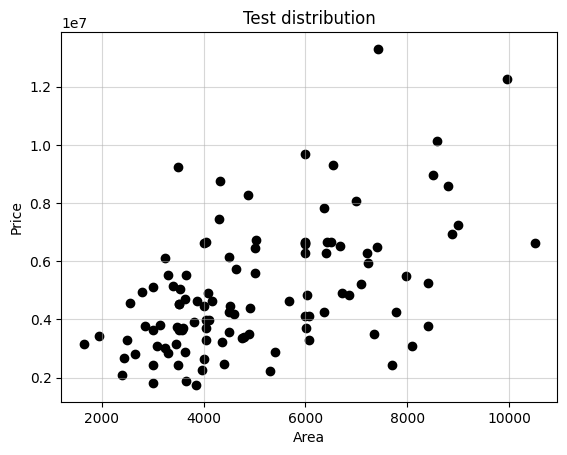

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=X_test_1d, y=y_test_1d ,c='black')

ax.set_title("Test distribution")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
plt.grid(True, alpha=0.5)
plt.show()

### Exercise 3.1

Create a `LinearRegression()` object and fit the linear regression on the training data. Replace `None` with your code.

In [25]:
#### START CODE HERE ####
from sklearn.linear_model import LinearRegression
#### Approximately 2 line ####

regr = LinearRegression()
regr.fit(X_train_1d, y_train_1d)
#! --> output: 
#!fit_intercept 	True --> calcola anche l'intereccta w_0 in y = w_1x + w_0
#!copy_X 	True --> crea copia delle iput feature prima di lavorarci ed eventualmente modificarli (per risparmiare memoria)
#tol 	1e-06
#n_jobs 	None
#!positive 	False --> se True forza l'algoritmo a mantenere tutti i coefficienti >=0

#### END CODE HERE ####

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Exercise 3.2

Predict the prices of the houses for your **training data** in a variable `y_pred_train_1d`.

In [27]:
#### START CODE HERE ####
#### Approximately 1 line ####

y_pred_train_1d = regr.predict(X_train_1d)

#### END CODE HERE ####

The next cell visualize the learned straight line on your **training data**. Run the following cell to visualize the learned line.

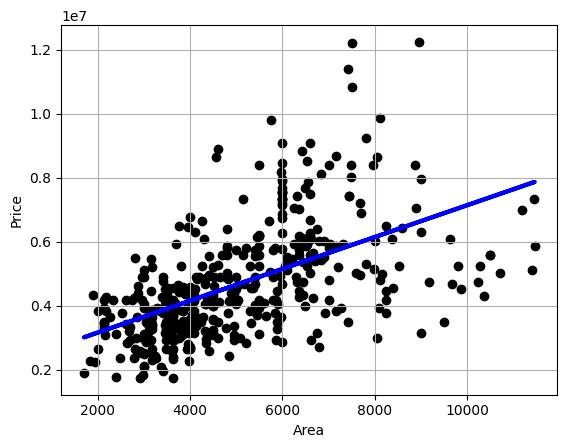

In [31]:
plt.scatter(X_train_1d, y_train_1d, color="black") #punti reali
plt.plot(X_train_1d, y_pred_train_1d, color="blue", linewidth=3) #retta di regressione date le feature di training

plt.xlabel("Area")
plt.ylabel("Price")
plt.xticks() #mostrano tacchette sugli assi
plt.yticks()

plt.grid(True)
plt.show()

### Exercise 3.3

Predict the prices of the houses for your **test data** in a variable `y_pred_test_1d`.

In [32]:
#### START CODE HERE ####
#### Approximately 1 line ####

y_pred_test_1d = regr.predict(X_test_1d)

#### END CODE HERE ####

The next cell visualize the learned straight line on your training data and the points of the **test data**. Run the following cell to visualize the learned line.

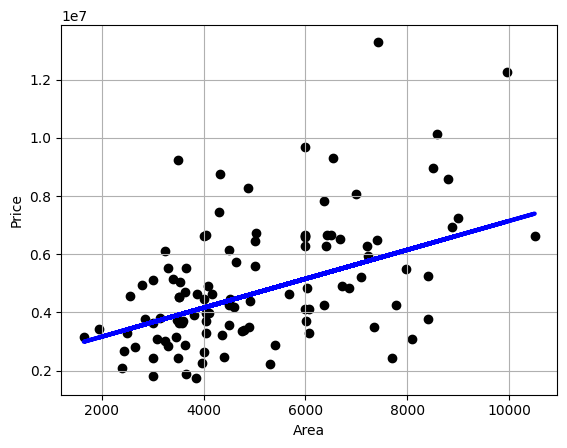

In [33]:
plt.scatter(X_test_1d, y_test_1d, color="black") #punti di test
plt.plot(X_test_1d, y_pred_test_1d, color="blue", linewidth=3) #retta di regressione sui dati di test

plt.xlabel("Area")
plt.ylabel("Price")
plt.xticks()
plt.yticks()

plt.grid(True)
plt.show()

### Exercise 3.4

Compute the **Mean Absolute Error**, the **Mean Squared Error** and the **R2** in the variables `mae_test`, `mse_test`, and `r2_test`, respectively. Replace `None` with your code.

You read more on such metrics in the official documentation:
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html" >mean_absolute_error</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" >mean_squared_error</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html" >r2_score</a>

In [34]:
#### START CODE HERE ####
#### Approximately 3 line ####

mae_test = mean_absolute_error(y_test_1d, y_pred_test_1d)
mse_test = mean_squared_error(y_test_1d, y_pred_test_1d)
r2_test = r2_score(y_test_1d, y_pred_test_1d)

#### END CODE HERE ####

In [35]:
print(f"Mean of the prices: {price_mean}")
print(f"Std of the prices: {price_std}")
print(f"Variance of the prices: {price_var}")

print(f"\nMean Absolute Error on test data: {mae_test}")
print(f"Mean Squared Error on test data: {mse_test}")
print(f"R2 score on test data: {r2_test}")

Mean of the prices: 4766729.247706422
Std of the prices: 1870439.6156573922
Variance of the prices: 3498544355820.573

Mean Absolute Error on test data: 1407509.8013314893
Mean Squared Error on test data: 3575212178202.1855
R2 score on test data: 0.2467447918823492


The model does not seem to perform very well. Let's see if we can improve by using all the input features.

<a id='4'></a>
## 4. Regression with all input features

Now you will train and evaluate several regression models with **all the numerical input features**.

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


Run the next cell to select all the numerical input features as input.

In [92]:
df_X = df.loc[:, "area":] #oea le input feature sono molteplici, non soltanto l'area
df_y = df["price"]

Run the next cell to split the data into training and test sets.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=True, random_state=42) #di nuovo


In [39]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking
46,6000,3,2,4,1
93,7200,3,2,1,3
335,3816,2,1,1,2
412,2610,3,1,2,0
471,3750,3,1,2,0


In [40]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking
316,5900,4,2,2,1
77,6500,3,2,3,0
360,4040,2,1,1,0
90,5000,3,1,2,0
493,3960,3,1,1,0


As you can see, the input features have very **different scales**. As discussed in previous labs, features with different scales differentially impact the calculation of validation metrics. We must therefore perform, separately for each column, the **normalization of the input features**.

However, this time we have both training and test set. When you have both training and test, you have to **calculate statistics for the normalization on the training** (i.e., with the `fit_transform()` method) and **use those statistics on the test set** (i.e., with the `transform()` method). This is because the model cannot learn on the test data. This data simulates data never seen by the model on which it will have to make predictions. Therefore, they cannot even be used to estimate some statistics about the data.

In this case, we want to perform **min-max normalization** of the dataset. To achieve this in scikit-learn is simple. There is a function in the pre-processing module to do this. However, as introduced before, the min and max are calculated only on the training and are used to normalize both the training and the test.

If this step is not clear to you, don't worry. We will see it in detail when we talk about data pre-processing.

Run the following cell to perform the Min-Max normalization.

In [94]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_processed = min_max_scaler.fit_transform(X_train) #se facciamo solo .fit(X_train) poi dobbiamo fare anche .transform(), con fit_transform() invece fa entrambi
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train.columns)

X_test_processed = min_max_scaler.transform(X_test) #solo transform
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test.columns)


In [43]:
X_train_processed.head()

,area,bedrooms,bathrooms,stories,parking
0,0.298969,0.4,0.333333,1.000000,0.333333
1,0.381443,0.4,0.333333,0.000000,1.000000
2,0.148866,0.2,0.000000,0.000000,0.666667
3,0.065979,0.4,0.000000,0.333333,0.000000
4,0.144330,0.4,0.000000,0.333333,0.000000


In [44]:
X_test_processed.head()

,area,bedrooms,bathrooms,stories,parking
0,0.292096,0.6,0.333333,0.333333,0.333333
1,0.333333,0.4,0.333333,0.666667,0.000000
2,0.164261,0.2,0.000000,0.000000,0.000000
3,0.230241,0.4,0.000000,0.333333,0.000000
4,0.158763,0.4,0.000000,0.000000,0.000000


As you can see, after normalization, all features in the training set are in the range [0, 1].

### Exercise 4.1

Now you will train and evalaute several regression models on the preprocessed data. Note that you should use `X_train_processed` and `X_test_processed` as input of your models.


This exercise is open. So it's up to you to choose regression models from those available on scikit-learn, train and validate them.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

#!Regressione Lineare (già fatto):
#È il punto di partenza, ma spesso non cattura relazioni non lineari.

#!Regressione Polinomiale:
#Utile se sospetti una relazione non lineare tra le feature e il target.
#Si implementa combinando PolynomialFeatures di scikit-learn con un modello lineare.

#!Regressione Ridge e Lasso:
#Sono versioni regolarizzate della regressione lineare.
#Aiutano a prevenire l’overfitting, specialmente con molte feature.

#!Alberi di Decisione e Random Forest:
#Modelli non lineari che possono catturare relazioni complesse.
#Spesso performano bene senza bisogno di normalizzazione.

#!Support Vector Regression (SVR):
#Utile per dati con outlier o distribuzioni particolari.

#!REGRESSIONE LINEARE
regr = LinearRegression() #regressore lineare
regr.fit(X_train_processed, y_train) #regressore allenato sul training set preprocessato (normalizzato) in cui minimizza la somma quadratica delle distanze 

y_pred_train = regr.predict(X_train_processed) #y della regressione sulle feature di training

#Ho molteplici features, non ha senso plottare
y_pred_test = regr.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regr, X_train_processed, y_train, cv=5, scoring='r2') #!usato per dare una valutazione al MODELLO USATO (regressore lineare), ovvero la sua EFFICACIA, in relazione al dataset sul quale si allena (dati simili saranno anche sul TEST)
#!quindi se l'array di metriche (usa metrica di default se non specifichiamo 'r2') non e buono, forse dovremmo usare uin altro modello
#esegue l'intero algorimo di cross_validation, quindi 
#per k iterazioni divide il TRAINING SET (anche qui come per la scelta degli iperparametri del modello) in TRAINING (k-1 sets) + TEST (1 set) ed esegue predizioni sul nuovo TEST SET per ottenere Y_pred.
#per ogni Y_pred poi, calcola il punteggio richiesto (R2, MSE, ecc..), cosi ne valutiamo la robustezza
y_pred_cv = cross_val_predict(regr, X_train_processed, y_train, cv=5) #!usato per stimare le prestazioni e confrontare il risultato con quello ottenuto con il semplice .predict() visto prima
#esegue l'intero algorimo di cross_validation, quindi 
#per k iterazioni divide il TRAINING SET (anche qui come per la scelta degli iperparametri del modello) in TRAINING (k-1 sets) + TEST (1 set) ed esegue predizioni sul nuovo TEST SET per ottenere Y_pred.
#N.B.: ogni feature viene inserita nel TEST SET solo una volta per tutte e K le iterazioni, dunque avra solo una volta la sua Y_pred, di conseguenza alla fine dell'algoritmo Y_pred sara un array con tuttte 
#le predizioni, una per campione
#print(f"Score of cross_val_score with linear regression: {cross}") #!not good --> try another model


#print(f"\nMean Absolute Error on test data with linear regression: {mae_test}")
#print(f"Mean Squared Error on test data with linear regression: {mse_test}")
#print(f"R2 score on test data with linear regression: {r2_test}")

#!REGRESSIONE POLINOMIALE
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X_train_processed) #crea nuove features con tutte le combinazioni a partire dalle feature di partenza
#es. X_iniziale = [x1, x2], X_poly =  [1, x1 , x2 , x1^2 , x2^2 , x1x2]
#poi posso usare queste nuove feature per allenare il modello lineare
#! regr.fit(X_poly, y_train) 

#piu semplicemente
from sklearn.pipeline import make_pipeline

regPoly = make_pipeline(PolynomialFeatures(2), LinearRegression()) #ho gia il regressore da allenare sui dati originali

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

#print(f"\nScore of cross_val_score with grade 2 regression: {cross}") #!not good --> try another model


#print(f"\nMean Absolute Error on test data with grade 2 regression: {mae_test}")
#print(f"Mean Squared Error on test data with grade 2 regression: {mse_test}")
#print(f"R2 score on test data with grade 2 regression: {r2_test}")

#!RIDGE E LASSO (alpha casuale)
from sklearn.linear_model import Ridge

regPoly = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.5)) #! alpha casuale per ora

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with Ridge grade 2 regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with Ridge grade 2 regression: {mae_test}")
print(f"Mean Squared Error on test data with Ridge grade 2 regression: {mse_test}")
print(f"R2 score on test data with Ridge grade 2 regression: {r2_test}")


from sklearn.linear_model import Lasso

regPoly = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.5, max_iter=100000)) #! alpha casuale per ora, maxiter da aumentare se non converge

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with Lasso grade 2 regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with Lasso grade 2 regression: {mae_test}")
print(f"Mean Squared Error on test data with Lasso grade 2 regression: {mse_test}")
print(f"R2 score on test data with Lasso grade 2 regression: {r2_test}")


#!RIDGECV E LASSOCV (alpha ottimizzatO)
#1) RidgeCV e LassoCV per ottimizzare solo alpha con CROSS-VALIDATION (vedi teoria pagina 4)\
from sklearn.linear_model import RidgeCV
alphas = [0.01, 0.1, 0.5, 1, 10, 100]
regPoly = make_pipeline(PolynomialFeatures(2), RidgeCV(alphas=alphas, cv=5)) #! alpha ottimizzato con cv sulla base degli alphas

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with RidgeCV grade 2 regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with RidgeCV grade 2 regression: {mae_test}")
print(f"Mean Squared Error on test data with RidgeCV grade 2 regression: {mse_test}")
print(f"R2 score on test data with RidgeCV grade 2 regression: {r2_test}")


from sklearn.linear_model import LassoCV
alphas = [0.01, 0.1, 0.5, 1, 10, 100]
regPoly = make_pipeline(PolynomialFeatures(2), LassoCV(alphas=alphas, cv=5, max_iter=100000)) #! alpha ottimizzato con cv sulla base degli alphas, maxiter da aumentare se non converge

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with LassoCV grade 2 regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with LassoCV grade 2 regression: {mae_test}")
print(f"Mean Squared Error on test data with LassoCV grade 2 regression: {mse_test}")
print(f"R2 score on test data with LassoCV grade 2 regression: {r2_test}")

#!GRIDSEARCHCV (grado polinomio e alpha ottimizzati)
#2) GridSearchCV per ottimizzare sia alpha che grado polinomio con CROSS-VALIDATION (vedi teoria pagina 4)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4], #in questo caso ho una pipeline come modello, quindi devo specificare prima del nome del parametro, anche il nome del modello
    'ridge__alpha': [0.01, 0.1, 0.5, 1, 10, 100] #se avessi solo un modello invece di una pipe, basterebbe il nome 'alpha'
    }
#!ordine parametri deve essere uguale a ordine modelli
pipe = make_pipeline(PolynomialFeatures(), Ridge()) #! uso solo Ridge, poi pensa a tutto GridSearch

regPoly = GridSearchCV(pipe, param_grid, cv=5, scoring='r2') #metto scoring in quanto usa r2 per calcolare l'overall score del parametro tenendo contro dei singoli score dei modelli di ogni fold (vedi teoria pagina 4)

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with Ridge e GridSearchCV regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with Ridge e GridSearchCV regression: {mae_test}")
print(f"Mean Squared Error on test data with Ridge e GridSearchCV regression: {mse_test}")
print(f"R2 score on test data with Ridge e GridSearchCV regression: {r2_test}")


param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
    'lasso__alpha' : [0.01, 0.1, 0.5, 1, 10, 100],
    }
pipe = make_pipeline(PolynomialFeatures(), Lasso()) #! alpha ottimizzato con cv sulla base degli alphas, maxiter da aumentare se non converge
regPoly = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

regPoly.fit(X_train_processed, y_train)

y_pred_test = regPoly.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(regPoly, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with Lasso e GridSearchCV regression: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with Lasso e GridSearchCV regression: {mae_test}")
print(f"Mean Squared Error on test data with Lasso e GridSearchCV regression: {mse_test}")
print(f"R2 score on test data with Lasso e GridSearchCV regression: {r2_test}")



#!ALBERI DI DECISIONE:
#per questi modelli non serve normalizzare, ma possiamo comunque usare le features normalizzate
from sklearn.tree import DecisionTreeRegressor #regressore con albero decisionale (esiste il classificatore per classificazione)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_processed, y_train)
y_pred_test = dt_reg.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(dt_reg, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with DecisionTreeRegressor: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with DecisionTreeRegressor: {mae_test}")
print(f"Mean Squared Error on test data with DecisionTreeRegressor: {mse_test}")
print(f"R2 score on test data with DecisionTreeRegressor: {r2_test}")







In [102]:

#!RANDOM FOREST:
#per questi modelli non serve normalizzare, ma possiamo comunque usare le features normalizzate

from sklearn.ensemble import RandomForestRegressor #regressore con random forest (esiste il classificatore per classificazione)

dt_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg.fit(X_train_processed, y_train)
y_pred_test = dt_reg.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(dt_reg, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with RandomForestRegressor: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with RandomForestRegressor: {mae_test}")
print(f"Mean Squared Error on test data with RandomForestRegressor: {mse_test}")
print(f"R2 score on test data with RandomForestRegressor: {r2_test}")


Score of cross_val_score with DecisionTreeRegressor: [0.49237785 0.53522922 0.31620133 0.44231639 0.41013081]

Mean Absolute Error on test data with DecisionTreeRegressor: 1151517.4750764528
Mean Squared Error on test data with DecisionTreeRegressor: 2602278408566.219
R2 score on test data with DecisionTreeRegressor: 0.48516327170636075


In [ ]:


#!SVR (Support Vector Regression):
#per questi modelli non serve normalizzare, ma possiamo comunque usare le features normalizzate

from sklearn.svm import SVR #regressore con SVR (esiste il classificatore SVC per classificazione)

svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.2) 
#kernel indica la funzione da usare, rbf = Radial Basis Function, permette di modellare relazioni non linr=eari tra feature e target
#C indica la regolarizzazione, piu e basso e piu e regolarizzato --> riduce overfitting e robustezza ad outlier
#epsilon = tolleranza all'errore, piu e grande e piu e tollerante in quanto aumenta l'intervallo in cui si ignorano gli errori
svr_reg.fit(X_train_processed, y_train)
y_pred_test = svr_reg.predict(X_test_processed)

mae_test = mean_absolute_error(y_true= y_test, y_pred=y_pred_test)
mse_test = mean_squared_error(y_true= y_test, y_pred=y_pred_test)
r2_test = r2_score(y_true= y_test, y_pred=y_pred_test)
cross = cross_val_score(svr_reg, X_train_processed, y_train, cv=5, scoring='r2')

print(f"\nScore of cross_val_score with SVR: {cross}") #!not good --> try another model


print(f"\nMean Absolute Error on test data with SVR: {mae_test}")
print(f"Mean Squared Error on test data with SVR: {mse_test}")
print(f"R2 score on test data with SVR: {r2_test}")


Score of cross_val_score with RandomForestRegressor: [-0.07152429 -0.12038423 -0.0004214  -0.0974959  -0.03481916]

Mean Absolute Error on test data with RandomForestRegressor: 1763887.3888996507
Mean Squared Error on test data with RandomForestRegressor: 5567928620349.141
R2 score on test data with RandomForestRegressor: -0.10156320893138737
